<a href="https://colab.research.google.com/github/hnhyhj/Python-and-CCC/blob/master/34_Sorting_and_Greedy_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 34 

#Sorting and Greedy Algorithm

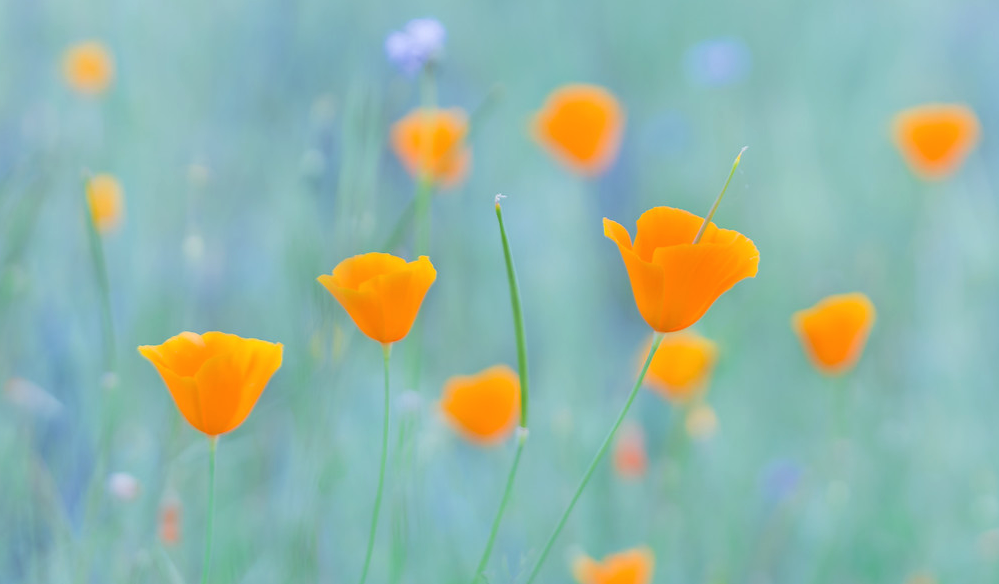

## 34.1 Python Sorting HOWTO


[HOWTO](https://https://docs.python.org/3/howto/sorting.html)


```
Python lists have a built-in list.sort() method that modifies the list in-place. 
There is also a sorted() built-in function that builds a new sorted list from an iterable.

* A simple ascending sort is very easy: just call the sorted() function. It returns a new sorted list:
```






In [1]:
sorted([5, 2, 3, 1, 4])

[1, 2, 3, 4, 5]



```
You can also use the list.sort() method. It modifies the list in-place (and returns None to avoid confusion). 
Usually it’s less convenient than sorted() - but if you don’t need the original list, it’s slightly more efficient.
```



In [2]:
a = [5, 2, 3, 1, 4]
a.sort()
a

[1, 2, 3, 4, 5]



```
Another difference is that the list.sort() method is only defined for lists. 
In contrast, the sorted() function accepts any iterable.
```



In [4]:
sorted({1: 'D', 3: 'B', 2: 'B', 4: 'E', 5: 'A'})

[1, 2, 3, 4, 5]

In [5]:
sorted({1, 5, 3, 4, 19, 10})

[1, 3, 4, 5, 10, 19]

In [8]:
b = [(1,2), (5,1), (3,4), (11,12)]
b.sort()
b

[(1, 2), (3, 4), (5, 1), (11, 12)]

### 34.1.1 Key Functions



```
Both list.sort() and sorted() have a key parameter to specify a function (or other callable) 
to be called on each list element prior to making comparisons.

For example, here’s a case-insensitive string comparison:
```



In [9]:
sorted("This is a test string from Andrew".split(), key=str.lower)

['a', 'Andrew', 'from', 'is', 'string', 'test', 'This']



```
The value of the key parameter should be a function (or other callable) that takes a single argument and 
returns a key to use for sorting purposes. This technique is fast because the key function is called exactly 
once for each input record.

A common pattern is to sort complex objects using some of the object’s indices as keys. For example:
```



In [10]:
student_tuples = [
    ('john', 'A', 15),
    ('jane', 'B', 12),
    ('dave', 'B', 10),
]

sorted(student_tuples, key=lambda student: student[2])   # sort by age

[('dave', 'B', 10), ('jane', 'B', 12), ('john', 'A', 15)]

## 34.2 Sorting theory

The basic problem in sorting is as follows:


```
Given an array that contains n elements, your task is to sort the elements in
increasing order.

For example, the array:
1 3 8 2 9 2 5 6 

will be as follows after sorting:
1 2 2 3 5 6 8 9
```




### 34.2.1 O(n) algorithms